In [1]:
import json # importing json library
import glob # importing glob library
import os # importing OS library
import csv # importing csv
import logging # import logging
import matplotlib.pyplot as plt
import operator # importing operator
from nltk.corpus import stopwords
from collections import Counter  # importing counter
!pip install -U textblob
import nltk
from textblob import TextBlob
import numpy as np

Requirement already up-to-date: textblob in c:\programdata\anaconda3\lib\site-packages
Requirement already up-to-date: nltk>=3.1 in c:\programdata\anaconda3\lib\site-packages (from textblob)
Requirement already up-to-date: six in c:\programdata\anaconda3\lib\site-packages (from nltk>=3.1->textblob)


In [2]:
def getLogger(dir):
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger()
    # create a file handler
    handler = logging.FileHandler(fileDir+'/USElectionAnalysis.log')
    handler.setLevel(logging.INFO)
    # create a logging format
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    # add the handlers to the logger
    logger.addHandler(handler)
    return logger

In [3]:
fileDir = os.path.dirname(os.path.realpath('__file__'))
logger = getLogger(fileDir)
logger.info("Application started....")
logger.info("Reading JSON files from data folder.")
filenames = sorted(glob.glob(fileDir+'/data/*.json')) # reading all the filenames in the data folder
logger.info(str(len(filenames)) + " number of JSON files found in data folder")

INFO:root:Application started....
INFO:root:Reading JSON files from data folder.
INFO:root:562 number of JSON files found in data folder


In [4]:
articles = []
logger.info("Iterating through all the JSON files.")
for file in filenames:  # iterating through all the files
    #file = 'D:/NEU/Spring2017/Python/midterm/data/20170201.0.json'
    with open(file) as data_file:    
        content = json.load(data_file) # load JSON
        articles.extend(content['response']['docs'])
logger.info(str(len(articles)) + " number of articles files found.")

INFO:root:Iterating through all the JSON files.
INFO:root:4871 number of articles files found.


In [5]:
trumpArticles = []
clintonArticles = []
for article in articles:
    text = ''
    if article.get('headline').get('main') :
        text = (article.get('headline').get('main')).lower()
#     if article.get("lead_paragraph") :
#         text = text + (article.get("lead_paragraph")).lower()
#     if article.get("abstract") :
#         text = text + (article.get("abstract")).lower()
    trumpCount = [word for word in text.split() if word in ['trump', 'donald']]
    clintonCount = [word for word in text.split() if word in ['hillary', 'clinton']]
    if len(trumpCount) > len(clintonCount):
        trumpArticles.append(article)
    elif len(trumpCount) < len(clintonCount):
        clintonArticles.append(article)

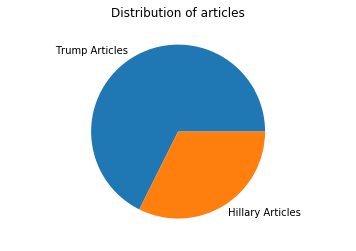

In [6]:
sums = [len(trumpArticles), len(clintonArticles)]
plt.axis('equal');
plt.pie(sums, labels=['Trump Articles', 'Hillary Articles'])
plt.title('Distribution of articles')
plt.show()

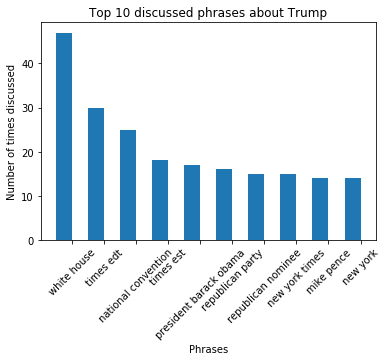

In [7]:
names = ['donald', 'trump', 'hillary', 'clinton', 'j', 'j.', 'presidential']
text1=''
for article in trumpArticles:
    if article.get('headline').get('main') :
        text1 = text1 + (article.get('headline').get('main')).lower()
    if article.get("lead_paragraph") :
        text1 = text1 + (article.get("lead_paragraph")).lower()
    if article.get("abstract") :
        text1 = text1 + (article.get("abstract")).lower()
blob = TextBlob(text1)
filtered_words = [phrase for phrase in blob.noun_phrases if not any(word in names for word in phrase.split())]
sortedDict = sorted(dict(Counter(filtered_words)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
y = [val for key, val in sortedDict][:10]
labels = [key for key, val in sortedDict][:10]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of times discussed')
plt.xlabel('Phrases')
plt.title('Top 10 discussed phrases about Trump' )
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=45)
plt.show()

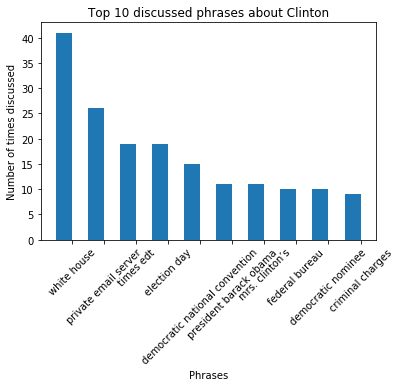

In [8]:
text2=''
for article in clintonArticles:
    if article.get('headline').get('main') :
        text2 = text2 + (article.get('headline').get('main')).lower()
    if article.get("lead_paragraph") :
        text2 = text2 + (article.get("lead_paragraph")).lower()
    if article.get("abstract") :
        text2 = text2 + (article.get("abstract")).lower()
blob = TextBlob(text2)
filtered_words = [phrase for phrase in blob.noun_phrases if not any(word in names for word in phrase.split())]
sortedDict = sorted(dict(Counter(filtered_words)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
y = [val for key, val in sortedDict][:10]
labels = [key for key, val in sortedDict][:10]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of times discussed')
plt.xlabel('Phrases')
plt.title('Top 10 discussed phrases about Clinton')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=45)
plt.show()